In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import scipy
from tqdm import tnrange


In [7]:
#AP True 0.9156042360417361 0.9156042360417361 0.0096387818643847 0.0096387818643847
#Na True 0.8143590159840158 0.8386963383838383 0.06843242335670274 0.06615087825324792
#No Na True 0.34974221611721606 0.6056746031746031 0.0940514647548976 0.11510389858903808
#Comb Pred 0.47738816738816736 0.5966674783549784 0.13561578097444554 0.12230436902117042
#Whole Pred 0.34591172716172713 0.5486351367828324 0.11432601029228029 0.13394760326878388
#Joint Pred 0.571482357919858 0.5902901959151958 0.11677126832211036 0.12180384937549094
#Interact Pred 0.476412191974692 0.613834595959596 0.12597806436497425 0.1120788110075319
#Dual Pred 0.5339070096570098 0.6027269119769121 0.11504890323598695 0.12183115172010493
#Dual Joint Pred 0.5353483738483739 0.608891206016206 0.12105461715699198 0.12160309192516046
#Dual Interact Pred 0.5319628704628704 0.597951479076479 0.11431395145981849 0.13002215512915635

In [8]:
ap_true_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/ap_true/coinc_4ms_15v.npy")
na_true_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/na_true/coinc_4ms_15v.npy")
nona_true_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/nona_true/coinc_4ms_15v.npy")
comb_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/coinc_4ms_15v.npy")
joint_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/joint_coinc_4ms_15v.npy")
interact_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/interact_coinc_4ms_15v.npy")
whole_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/whole_pred/coinc_4ms_15v.npy")
dual_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/dual_coinc_4ms_15v.npy")
dual_joint_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/dual_joint_coinc_4ms_15v.npy")
dual_interact_pred_coinc = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/dual_interact_coinc_4ms_15v.npy")

NameError: name 'na_pred_coinc' is not defined

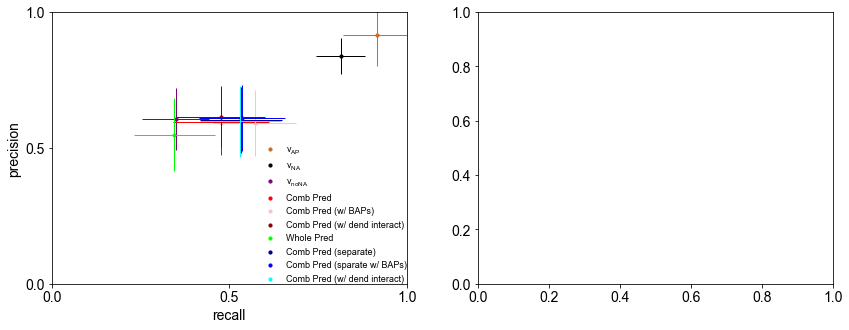

In [9]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '14'

fig, axs = plt.subplots(ncols=2, figsize=(14,5))

axs[0].scatter(0.9156042360417361, 0.9156042360417361, color="chocolate", s=10, label="$\mathregular{v_{AP}}$")
axs[0].scatter(0.8143590159840158, 0.8386963383838383, color="black", s=10, label="$\mathregular{v_{NA}}$")
axs[0].scatter(0.34974221611721606, 0.6056746031746031, color="purple", s=10, label="$\mathregular{v_{noNA}}$")
axs[0].scatter(0.47738816738816736, 0.5966674783549784, color="red", s=10, label="Comb Pred")
axs[0].scatter(0.571482357919858, 0.5902901959151958, color="pink", s=10, label="Comb Pred (w/ BAPs)")
axs[0].scatter(0.476412191974692, 0.613834595959596, color="darkred", s=10, label="Comb Pred (w/ dend interact)")
axs[0].scatter(0.34591172716172713, 0.5486351367828324, color="lime", s=10, label="Whole Pred")
axs[0].scatter(0.5339070096570098, 0.6027269119769121, color="navy", s=10, label="Comb Pred (separate)")
axs[0].scatter(0.5353483738483739, 0.608891206016206, color="blue", s=10, label="Comb Pred (sparate w/ BAPs)")
axs[0].scatter(0.5319628704628704, 0.597951479076479, color="cyan", s=10, label="Comb Pred (w/ dend interact)")


axs[0].errorbar(0.9156042360417361, 0.9156042360417361, xerr=0.0940514647548976, yerr=0.11510389858903808,
             color="chocolate", linewidth=1)
axs[0].errorbar(0.8143590159840158, 0.8386963383838383, xerr=0.06843242335670274, yerr=0.06615087825324792,
             color="black", linewidth=1)
axs[0].errorbar(0.34974221611721606, 0.6056746031746031, xerr=0.0940514647548976, yerr=0.11510389858903808,
             color="purple", linewidth=1)
axs[0].errorbar(0.47738816738816736, 0.5966674783549784, xerr=0.13561578097444554, yerr=0.12230436902117042,
             color="red", linewidth=1)
axs[0].errorbar(0.571482357919858, 0.5902901959151958, xerr=0.11677126832211036, yerr=0.12180384937549094,
             color="pink", linewidth=1)
axs[0].errorbar(0.476412191974692, 0.613834595959596, xerr=0.12597806436497425, yerr=0.1120788110075319,
             color="darkred", linewidth=1)
axs[0].errorbar(0.34591172716172713, 0.5486351367828324, xerr=0.11432601029228029, yerr=0.13394760326878388,
             color="lime", linewidth=1)
axs[0].errorbar(0.5339070096570098, 0.6027269119769121, xerr=0.11504890323598695, yerr=0.12183115172010493,
             color="navy", linewidth=1)
axs[0].errorbar(0.5353483738483739, 0.608891206016206, xerr=0.12105461715699198, yerr=0.12160309192516046,
             color="blue", linewidth=1)
axs[0].errorbar(0.5319628704628704, 0.597951479076479, xerr=0.11431395145981849, yerr=0.13002215512915635,
             color="cyan", linewidth=1)
#axs[0].spines.right.set_visible(False)
#axs[0].spines.top.set_visible(False)
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].set_xticks([0,0.5,1])
axs[0].set_yticks([0,0.5,1])
axs[0].set_xlabel("recall")
axs[0].set_ylabel("precision")
axs[0].legend(frameon=False, loc=(0.58,-0.01), fontsize=9)

#####################

coinc = np.zeros((20,10))
coinc[:,0] = ap_true_coinc
coinc[:,1] = na_true_coinc
coinc[:,2] = nona_true_coinc
coinc[:,3] = comb_pred_coinc
coinc[:,4] = joint_pred_coinc
coinc[:,5] = interact_pred_coinc
coinc[:,6] = whole_pred_coinc
coinc[:,7] = dual_pred_coinc
coinc[:,8] = dual_joint_pred_coinc
coinc[:,9] = dual_interact_pred_coinc
bp = axs[1].boxplot(coinc, widths = 0.6, patch_artist=True)

color_list = ["chocolate", "black", "purple", "red", "pink", "darkred", "lime",
             "navy", "blue", "cyan"]

for i in range(len(color_list)):
    bp['boxes'][i].set_facecolor(color_list[i])
    bp['boxes'][i].set_alpha(0.5)
    plt.setp(bp["boxes"][i], edgecolor=color_list[i])
    bp['medians'][i].set_color(color_list[i])
    plt.setp(bp["fliers"][i], markeredgecolor=color_list[i])
    
    for j in range(2):
        plt.setp(bp["whiskers"][i*2+j], color=color_list[i])
        plt.setp(bp["caps"][i*2+j], color=color_list[i])


axs[1].tick_params(axis="x", length=0)
axs[1].set_yticks([0,0.5,1])
axs[1].set_ylim(0,1.05)
axs[1].set_ylabel("coincidence")
axs[1].set_xticklabels(["$\mathregular{v_{AP}}$",
            "$\mathregular{v_{NA}}$",
                    "$\mathregular{v_{noNa}}$",
                       "Comb Pred", "Comb Pred (w/ bPAs)", "Comb Pred (w/ dend interact)",
                       "Whole Pred",
                       "Comb Pred (separate)",
                       "Comb Pred (separate w/ bPAs)",
                       "Comb Pred (separate w/ dend interact)"], rotation=90)


plt.show()